In [1]:
import pandas as pd

# Baseline MLP Multiclass Classification Experiment

In [2]:
PATH = "../../my_data/identification-dataset/my_custom_data/big-identification-dataset.csv"
df = pd.read_csv(PATH)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160260 entries, 0 to 160259
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tdoa           160260 non-null  float64
 1   snr_an         160260 non-null  float64
 2   power_dif      160213 non-null  float64
 3   rx_snr         119746 non-null  float64
 4   rx_powerdif    119744 non-null  float64
 5   tof            119746 non-null  float64
 6   material       160260 non-null  object 
 7   NLOS_material  160260 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 9.8+ MB


In [4]:
df.dropna(inplace=True)

In [5]:
df.head()

,tdoa,snr_an,power_dif,rx_snr,rx_powerdif,tof,material,NLOS_material
0,-0.211129,145.678574,10.307022,215.300003,11.049919,5.009119,cardboard,1
1,-0.197054,134.321426,10.824654,192.000000,11.397888,5.027886,cardboard,1
2,-0.197054,134.321426,10.824654,236.149994,9.844360,5.065420,cardboard,1
3,-0.248663,104.107140,11.064209,236.149994,9.844360,5.065420,cardboard,1
4,-0.182979,113.250000,10.954155,185.000000,10.330307,5.027886,cardboard,1


In [6]:
df.describe()

,tdoa,snr_an,power_dif,rx_snr,rx_powerdif,tof,NLOS_material
count,119744.000000,119744.000000,119744.000000,119744.000000,119744.000000,119744.000000,119744.000000
mean,-0.009004,120.834692,12.863304,198.813199,11.032414,5.043572,1.750142
std,1.558409,39.876752,3.804028,31.198740,1.248188,0.022086,2.126004
min,-373.351807,6.208333,-17.027435,0.118671,-35.275032,4.952817,0.000000
25%,-0.211129,109.718750,11.155712,177.791672,10.306816,5.027886,0.000000
50%,-0.009384,127.750000,12.243141,198.449997,10.761261,5.041961,1.000000
75%,0.211129,144.041672,12.946575,222.399994,11.368462,5.056036,4.000000
max,4.077143,326.200012,32.832855,330.000000,36.156631,5.145180,6.000000


In [7]:
df['NLOS_material'].unique()

array([1, 0, 2, 3, 4, 5, 6])

## Classification

In [8]:
# Import modules from Scikit-learn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split   # Import train_test_split function
from sklearn import metrics   # import metrics modules for accuracy calculation
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Create a pipeline object for the model
pipe_MLP = make_pipeline(StandardScaler(),
                         MLPClassifier(solver='adam',
                                       hidden_layer_sizes=(100,100,100,100),
                                       random_state=0,
                                       max_iter=500,           # TODO: tune it later
                                       verbose=True
                                       )
                         )

In [10]:
# Extracted features 
X = df[['tdoa', 'snr_an', 'power_dif', 'rx_snr', 'rx_powerdif', 'tof']]
y = df['NLOS_material'] # Labels

In [11]:
# Split dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 70% training and 30% test

In [12]:
# Train the whole pipeline
pipe_MLP.fit(X_train, y_train)

Iteration 1, loss = 0.47863936
Iteration 2, loss = 0.33005108
Iteration 3, loss = 0.31657652
Iteration 4, loss = 0.30502024
Iteration 5, loss = 0.29922536
Iteration 6, loss = 0.29509517
Iteration 7, loss = 0.29135802
Iteration 8, loss = 0.29092438
Iteration 9, loss = 0.28762077
Iteration 10, loss = 0.28534558
Iteration 11, loss = 0.28370129
Iteration 12, loss = 0.28267334
Iteration 13, loss = 0.28146121
Iteration 14, loss = 0.28073425
Iteration 15, loss = 0.27999341
Iteration 16, loss = 0.27844502
Iteration 17, loss = 0.27788101
Iteration 18, loss = 0.27670458
Iteration 19, loss = 0.27527133
Iteration 20, loss = 0.27424218
Iteration 21, loss = 0.27395751
Iteration 22, loss = 0.27361898
Iteration 23, loss = 0.27316663
Iteration 24, loss = 0.27135785
Iteration 25, loss = 0.27164012
Iteration 26, loss = 0.27157420
Iteration 27, loss = 0.27033377
Iteration 28, loss = 0.26933782
Iteration 29, loss = 0.26916050
Iteration 30, loss = 0.26885366
Iteration 31, loss = 0.26728755
Iteration 32, los

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100),
                               max_iter=500, random_state=0, verbose=True))])

In [13]:
# Make predictions on the test data
y_pred = pipe_MLP.predict(X_test)

In [14]:
# Caluclate the accuracy on test data predicitons
print(f'Test Accuracy: {metrics.accuracy_score(y_test, y_pred) * 100}%')

Test Accuracy: 86.5410310655829%


In [19]:
print(f'Test Precision: {metrics.precision_score(y_test, y_pred, average="macro") * 100}%')

Test Precision: 76.7939309916365%


In [20]:
print(f'Test Recall: {metrics.recall_score(y_test, y_pred, average="macro") * 100}%')

Test Recall: 76.88037754401569%


In [21]:
print(f'Test F1: {metrics.f1_score(y_test, y_pred, average="macro" )}')

Test F1: 0.768196745248766


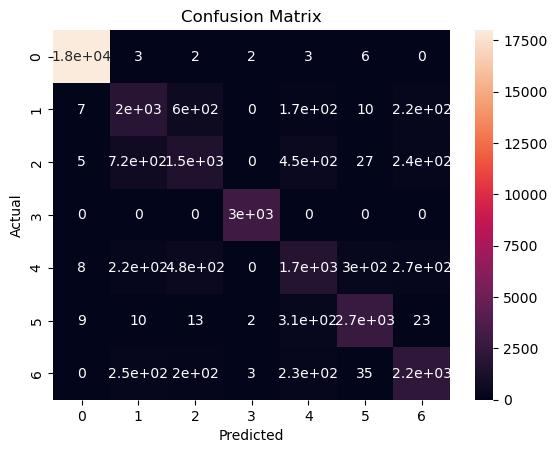

In [17]:
cm = confusion_matrix(y_test, y_pred)
# axis_labels = ['1', 'False']
plt.figure()
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()